Telegram-канал: https://t.me/+r7KAOw2PCAphYzVi

# Метрические методы классификации и регрессии

分类和回归的度量方法

На прошлой лекции мы обсуждали, какие задачи ставятся перед исследователями в парадигме Supervised Learning. Сегодня мы поговорим о том, как решать две наиболее популярные задачи - задачи классификации и регрессии - при помощи класса методов, которые называются метрическими.
_______________________________
**Напоминание:** Задачи обучения с учителем (то есть тех, в которых нам даны метки в обучающем датасете, а наша задача - научиться их предсказывать) делятся на несколько веток, одна из самых важных - задача классификации. В этом случае наша задача - предсказать класс некоторого объекта, то есть метка представляет собой один из  $M$  классов. Если  $M = 2$, то задача называется задачей бинарной классификации.

Вторая крупная ветка - это задача регрессии. В этом случае меткой служит число, принципиально не ограниченное каким-то конечным множеством. Это может быть произвольное значение, взятое из определенного интервала.

在上一讲中，我们讨论了在监督学习范式中为研究人员设定的任务。今天，我们将讨论如何使用一类称为度量方法的方法来解决两个最常见的问题——分类和回归。
_____________________________
**提醒：**监督学习问题（即在训练数据集中给予我们的标签并且我们的任务是学习预测它们的问题）分为几个分支，其中最重要的是分类问题。在这种情况下，我们的任务是预测某个对象的类别，即标签代表 $M$ 个类别之一。如果 $M = 2$，则该问题称为二元分类问题。

第二个主要分支是回归问题。在这种情况下，标签是一个数字，原则上不限于某个有限集。这可以是从某个区间中取出的任意值。

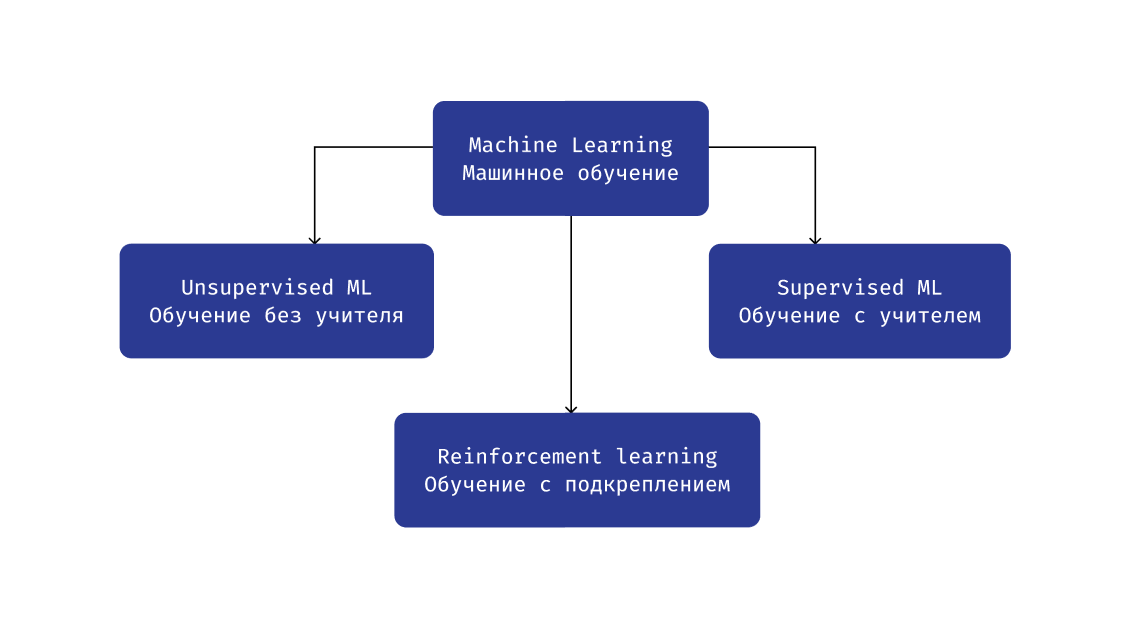

Рассмотрим для начала следующую задачу.

Хорошо известно, что жители столицы Англии, города Лондона, очень любят футбол, а также провести часок-другой в ресторане, обсуждая успехи любимой команды. Лондонцы болеют за команды целыми кварталами и даже районами. Даже владельцы ресторанов часто проявляют любовь и симпатию к той или иной команде в оформлении заведения, чем и привлекают туда болельщиков соответствующего клуба. Рассмотрим городские районы, среди которых выделим рестораны болельщиков клуба Chelsea и рестораны болельшиков клуба Arsenal.

Турист нашел эти рестораны в местных путеводителях, но на Tripadviser нет никаких сведений по поводу клубов. Турист - ярый болельщик Arsenal и хотел бы попасть в близкий по духу ресторан. Какой из двух возможных ресторанов (желтый и зеленый на карте) он должен посетить?

我们首先考虑以下问题。

众所周知，英国首都伦敦的居民非常喜欢足球，他们甚至愿意在餐厅里花上一两个小时讨论他们最喜欢的球队的成功。伦敦人支持整个街区甚至地区的球队。甚至餐馆老板也常常在餐馆的设计中表现出对特定球队的热爱和同情，从而吸引相应俱乐部的球迷。让我们来看看这个城市的各个区域，其中我们重点介绍切尔西球迷餐厅和阿森纳球迷餐厅。

游客在当地旅游指南中找到了这些餐厅，但在Tripadviser上却没有关于这些俱乐部的信息。这位游客是阿森纳队的狂热粉丝，想去一家精神上相近的餐厅。他应该去两家可能的餐厅（地图上黄色和绿色）中的哪一家？

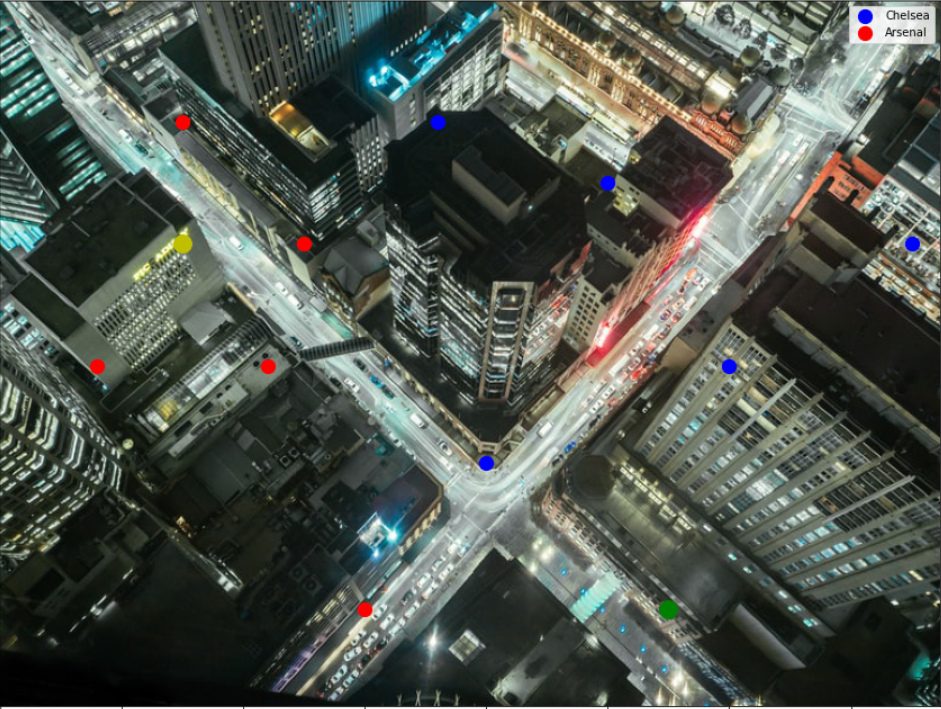

该地区餐厅的分布如上图所示。

现在我们来判断一下地图上黄色标记的场所属于哪个俱乐部？
还有绿色吗？

**你是如何做出选择的？**

Разброс ресторанов по району представлен на изображении выше.

А теперь давайте попробуем определить, к какому клубу относится заведение, отмеченное на карте желтым цветом?
А зеленым?

**Как вы сделали свой выбор?**

![](https://drive.google.com/uc?export=view&id=1wgLX08x3zVlh_uhqjlXkvQqh69mXimV8)

Ответ кроется в том, что вы оценивали статус ресторана по известным статусам наиболее близких к нему ресторанов! Воспользуемся этой идеей для разработки методов классификации.

答案是，您根据距离该餐厅最近的餐厅的已知状态来判断该餐厅的状态！让我们利用这个想法来开发分类方法。



# Обобщенный метрический классификатор

Пусть мы имеем информацию о $N$ объектах ${x_1} ... {x_N}$. Наша задача состоит в классификации объекта $X$ (для простоты будем рассматривать *бинарную* классификацию, как в случае с болельщиками Chelsea и Arsenal).



Пусть также мы можем определить $\textbf{близость}$ объекта $X$ к каждому из объектов $x_i$, то есть мы знаем функцию близости $\rho(x,y)$, обладающую следующими свойствами:
$$1. \rho(x,x) = 0, \rho(x,y) > 0$$
$$2. \rho(x,y) = \rho(y,x)$$
$$3. \rho(x,z) \leq \rho(x,y) + \rho(y,z)$$

Эти свойства абсолютно естественные и понятные: первое свойство говорит о том, что функция, которую мы хотим назвать расстоянием должна быть больше или равна нулю (при этом расстояние между двумя объектами равно нулю, только если эти объекты совпадают). Второе свойство говорит, что расстояние от первого объекта до второго равно расстоянию от второго до первого, а третье - это знаменитое неравенство треугольника, каждый из нас встречался с ним в школе.

Тогда упорядочим нашу выборку ${x_1} ... {x_N}$ по возрастанию значения функции $\rho$ (то есть близкие к $X$ объекты поставим первыми, а дальние - последними).

Пусть также каждый объект $x_i$ обладает своей собственной $\textbf{важностью}$ (например, насколько данный ресторан близок к классифицируемому, насколько долго идти или же - насколько много фанатов регулярно посещают этот ресторан), которую мы обозначим за $w_i(X)$.  $w_i(X)$ чаще всего будет зависеть от расстояния между $X$ и $x_i$.

Тогда алгоритм $\textbf{обобщенного метрического классификатора}$ строится следующим образом:
для каждого из двух классов 0 и 1 выберем те объекты из обучающей выборки, которые принадлежат соответствующему классу и просуммируем их важности.

Пусть $X^0$ - это множество объектов нулевого класса, а $X^1$ - множество объектов первого класса. Тогда $R_0$ - это суммарная важность объектов нулевого класса, а $R_1$ - первого.

$$R_0 = \sum\limits_{i |x_i \in X^0} w_i(X)$$
$$R_1 = \sum\limits_{i |x_i \in X^1} w_i(X)$$

И просто сравним их!
Если $R_0 > R_1$, значит общая важность (или близость) объектов класса 0 к классифицируемому оказалась больше, чем объекта класса 1. Значит, объект отнесем к классу 0. А иначе - наоборот.

广义度量分类器

让我们获得有关 $N$ 个对象 ${x_1} ... {x_N}$ 的信息。我们的任务是对对象 $X$ 进行分类（为简单起见，我们将考虑*二元*分类，例如切尔西和阿森纳球迷的情况）。



我们还确定对象 $X$ 与每个对象 $x_i$ 的 $\textbf{接近度}$，也就是说，我们知道接近度函数 $\rho(x,y)$，它具有以下属性：
$$1. \rho(x,x) = 0, \rho(x,y) > 0$$
$$2. \rho(x,y) = \rho(y,x)$$
$$3。 \rho(x,z) \leq \rho(x,y) + \rho(y,z)$$

这些性质绝对是自然而可以理解的：第一个性质表明，我们要调用距离的函数必须大于或等于零（而只有当这两个物体重合时，它们之间的距离才等于零）。第二个性质表示第一个物体到第二个物体的距离等于第二个物体到第一个物体的距离，第三个性质就是著名的三角不等式，我们每个人在学校都遇到过。

然后，我们将按照函数 $\rho$ 值的升序对样本 ${x_1} ... {x_N}$ 进行排序（也就是说，我们将把靠近 $X$ 的对象放在前面，把远处的对象放在最后）。

让每个对象 $x_i$ 也有自己的 $\textbf{重要性}$（例如，给定餐厅与被分类的餐厅有多近，到达那里需要多长时间，或者有多少粉丝定期光顾这家餐厅），我们用 $w_i(X)$ 表示。 $w_i(X)$通常取决于$X$和$x_i$之间的距离。

然后构建$\textbf{广义度量分类器}$的算法如下：
对于0和1这两个类，我们从训练样本中选择属于相应类的对象并计算它们的重要性之和。

令 $X^0$ 为零类对象集合，$X^1$ 为一类对象集合。那么 $R_0$ 就是零类对象的总重要性，$R_1$ 就是第一类对象的总重要性。

$$R_0 = \sum\limits_{i |x_i \in X^0} w_i(X)$$
$$R_1 = \sum\limits_{i |x_i \in X^1} w_i(X)$$

让我们比较一下它们吧！
如果 $R_0 > R_1$，则 0 类对象相对于被分类对象的整体重要性（或接近度）大于 1 类对象。因此，我们将该对象分配给 0 类。否则，情况正好相反。

# Метод k-ближайших соседей

k近邻方法

Частный случай метрического классификатора - это метод k-ближайших соседей. Его идея очень проста: все объекты обучающей выборки признаются либо одинаково важными для нас, либо неважными совершенно (то есть, обладающими нулевой важностью), в зависимости от того, входит ли этот объект в список k-ближайших.


度量分类器的一个特例是 k-最近邻方法。它的思想很简单：训练样本中的所有物体要么被认为对我们同等重要，要么被认为完全不重要（即重要性为零），这取决于这个物体是否包含在k-closest列表中。

# Выбор метрики

Выбор метрики $\rho(x,y)$ в пространстве объектов $X$ - это довольно серьёзная проблема. Метрика показывает нам, насколько похожи объекты, выбирать её можно по-разному. Метрику также можно настраивать по обучающей выборке.

В следующих определениях введены такие обозначения:

$x$ и $y$ здесь - это точки много мерного пространства $X$, в котором мы работаем. Каждая из этих точек представлена свои векторным описанием: $x = (x_1 ... x_n)$ и $y = (y_1 ... y_n)$.


选择指标

在对象$X$的空间中度量$\rho(x,y)$的选择是一个相当严重的问题。该度量向我们展示了物体的相似程度，并且可以用不同的方式进行选择。还可以根据训练样本来配置度量标准。

在以下定义中引入了以下符号：

这里的 $x$ 和 $y$ 是我们工作的多维空间 $X$ 中的点。每个点都由其自己的向量描述表示：$x = (x_1 ... x_n)$ 和 $y = (y_1 ... y_n)$。

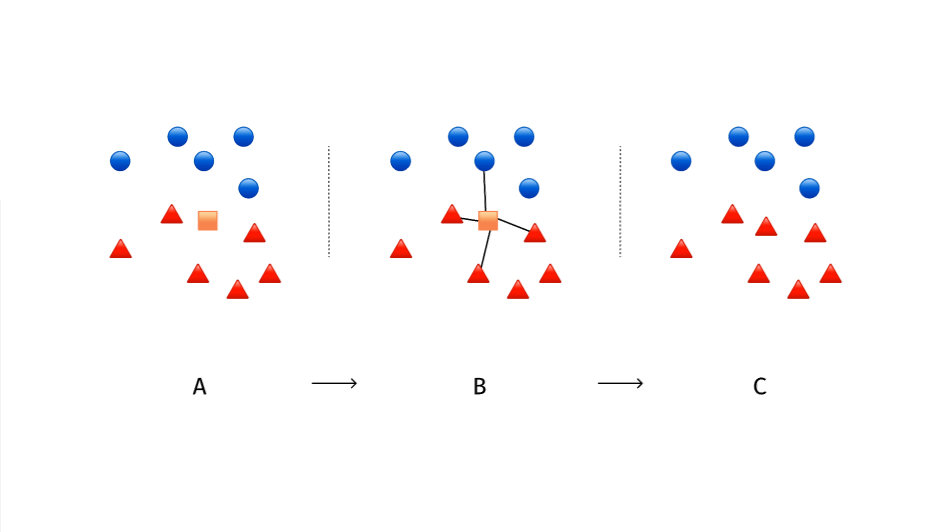


## 1. Евклидова метрика
Самая знакомая “школьная” мера сходства объектов

$$\rho(x,y) = (\sum\limits_{i=1}^n(x_i - y_i)^2)^{\frac{1}{2}}$$

Это всем знакомая теорема Пифагора: если есть точка $x$ и точка $y$, то расстояние между ними можно посчитать, как корень из суммы квадратов катетов соответствующего прямоугольного треугольника.

### Достоинства:
- Простота
- Интуитивность
- Частая применимость

### Недостатки:
- Сильно зависит от нормы векторов $x$ и $y$
- Чем выше размерность векторов, тем менее полезна Евклидова метрика





1. 欧几里得度量
最常见的“学校”物体相似性测量

$$\rho(x,y) = (\sum\limits_{i=1}^n(x_i - y_i)^2)^{\frac{1}{2}}$$

这就是著名的勾股定理：如果有一个点 $x$ 和一个点 $y$，那么它们之间的距离可以计算为对应直角三角形三条边的平方和的根。

优点：
- 简单
- 直观性
- 频繁适用

缺陷：
- 很大程度上取决于向量 $x$ 和 $y$ 的范数
- 向量的维数越高，欧氏度量的用处就越小

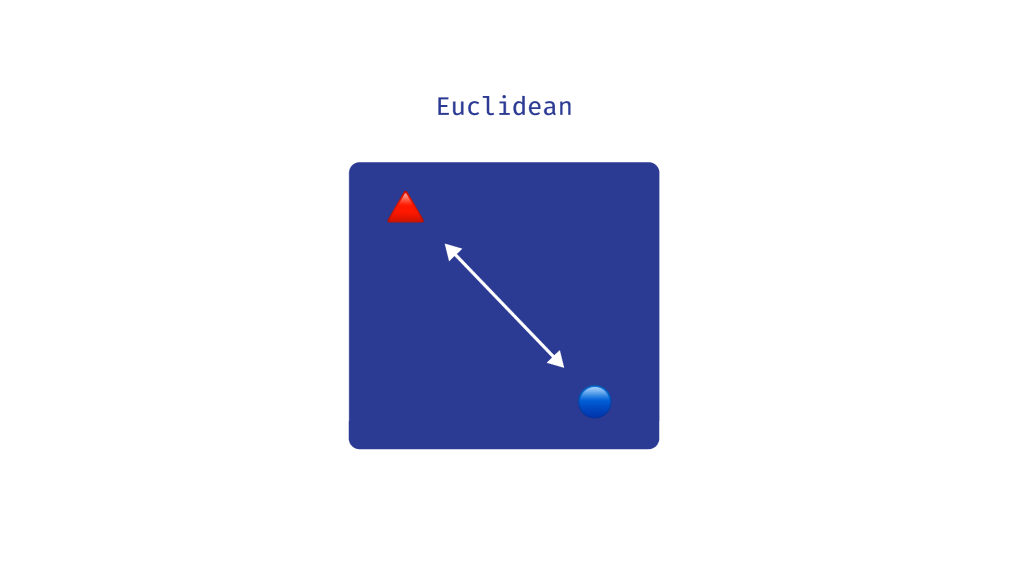


## 2. Косинусная схожесть

$$\rho^*(x,y) = \frac{(x,y)}{|x||y|} = \frac{\sum\limits_{i=1}^n{x_i}{y_i}}{|x||y|}$$

То есть в качестве метрики мы рассматриваем косинус угла между векторами.
Когда косинусная схожесть равна 0, между векторами нет ничего общего, они перпендекулярны.

### Достоинства:
- Хорошо подходит для работы с данными высокой размерности
- Определяется именно углом между векторами, поэтому не зависит от их нормы

### Недостатки:
- Теперь же мы не учитываем отличия норм векторов совсем. Для некоторых задач это может быть существенно

Примечание:

Для расстояния есть требование, что оно неотрицательно. Должно выполняться требование, что чем ближе вектора друг к другу, тем расстояние меньше. В данном случае, эти требования, очевидно, не выполнены


Часто используется величина, называемая косинусным расстоянием.
Косинусное расстояние вычисляется, как $\rho(x,y) = 1 - \frac{(x,y)}{|x||y|}$
И соотношение здесь противоположное:
когда косинусное расстояние равно 1, между векторами нет ничего общего. Это больше интуитивно похоже на расстояние в классическом смысле, именно поэтому часто используют его.

Обратите внимание: косинусное расстояние не удовлетворяет неравенству треугольника.


2. 余弦相似度

$$\rho^*(x,y) = \frac{(x,y)}{|x||y|} = \frac{\sum\limits_{i=1}^n{x_i}{y_i}}{|x||y|}$$

也就是说，我们将向量之间的角度的余弦视为一个度量标准。
当余弦相似度为 0 时，向量之间没有任何共同之处，它们是垂直的。

优点：
- 非常适合处理高维数据
- 它由向量之间的角度决定，因此它不依赖于它们的范数

缺陷：
- 现在我们完全不考虑向量范数的差异。对于某些任务来说这可能很重要。

笔记：

要求距离为非负数。必须满足的要求是，向量彼此越近，距离就越小。在这种情况下，这些要求显然无法满足。


经常使用的量称为余弦距离。
余弦距离的计算公式为 $\rho(x,y) = 1 - \frac{(x,y)}{|x||y|}$
这里的比例是相反的：
当余弦距离为 1 时，向量之间没有任何共同之处。它在直观上与古典意义上的距离更加相似，这就是它经常被使用的原因。

请注意，余弦距离不满足三角不等式。

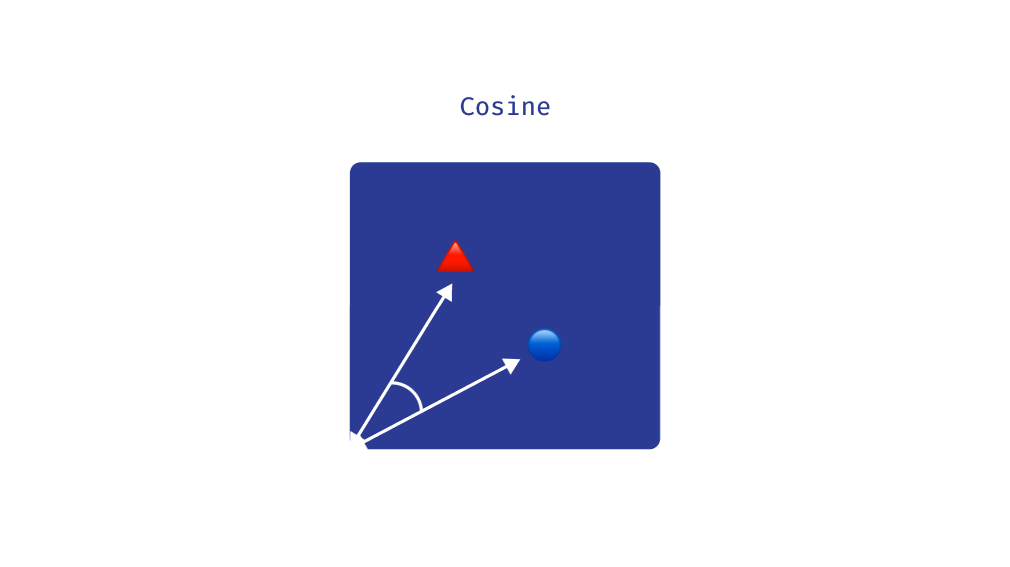

## 3. Расстояние городских кварталов (Манхэттенское)

$$\rho(x,y) = \sum\limits_{i=1}^n|x_i - y_i|$$

Эта метрика также довольно интуитивна:
Если Вы идете по городу, выстроенному ровными прямоугольными кварталами, Вы не сможете сократить свой путь наискосок, воспользовавшись теоремой Пифагора. Вам придется в любом случае пройти все расстояние вдоль обеих осей.

### Достоинства:
- Хорошо подходит для работы с дискретными (в частности бинарными) данными

### Недостатки:
- Подходит для довольно узкого круга задач




3. 城市街区之间的距离（曼哈顿）

$$\rho(x,y) = \sum\limits_{i=1}^n|x_i - y_i|$$

这个指标也非常直观：
如果您步行穿过一个由均匀的矩形街区建成的城市，您无法使用勾股定理对角线缩短您的路径。无论如何，您都必须沿着两个轴线走完全程。

优点：
- 非常适合处理离散（特别是二进制）数据

缺陷：
- 适用于相当狭窄范围的任务

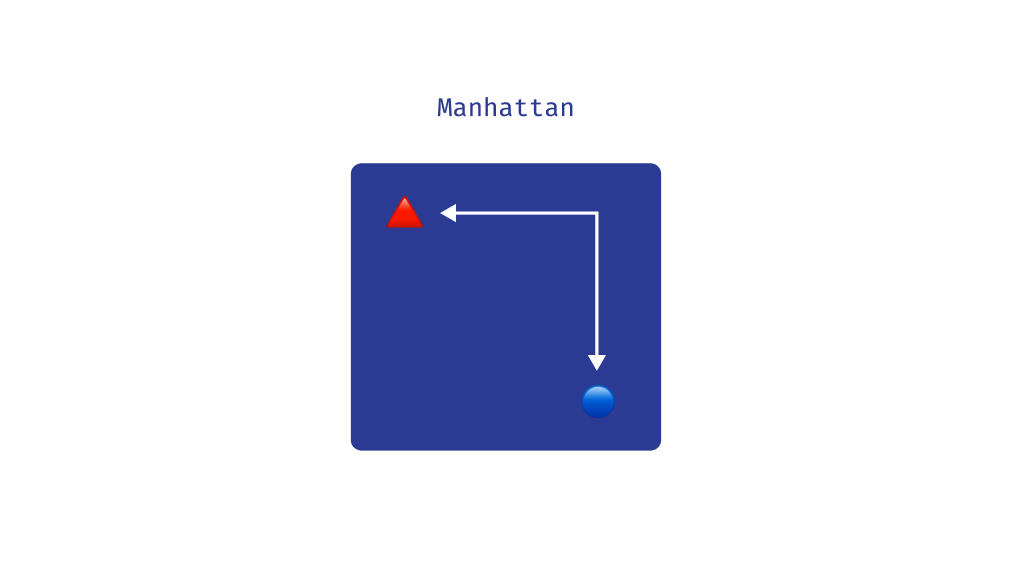

## 4. Формула Хаверсина

$$\rho(x,y) = 2arcsin\big{[}(sin^2(\frac{x_1 - y_1}{2}) + cos(x_1)cos(y_1)sin^2(\frac{x_2 - y_2}{2}))^{\frac{1}{2}}\big{]}$$

Формула связана со специфической задачей описания расстояния на сфере.

### Достоинства:
- Описывает расстояние на сфере

### Недостатки:
- Идеальные сферы в мире встречаются нечасто (даже земля далеко не идеальная сфера)

4. 半正矢公式

$$\rho(x,y) = 2arcsin\big{[}(sin^2(\frac{x_1 - y_1}{2}) + cos(x_1)cos(y_1)sin^2(\frac{x_2 - y_2}{2}))^{\frac{1}{2}}\big{]}$$

该公式与描述球面上的距离的具体问题有关。

优点：
- 描述球体上的距离

缺陷：
- 理想球体在世界上很少见（即使地球也远非理想球体）

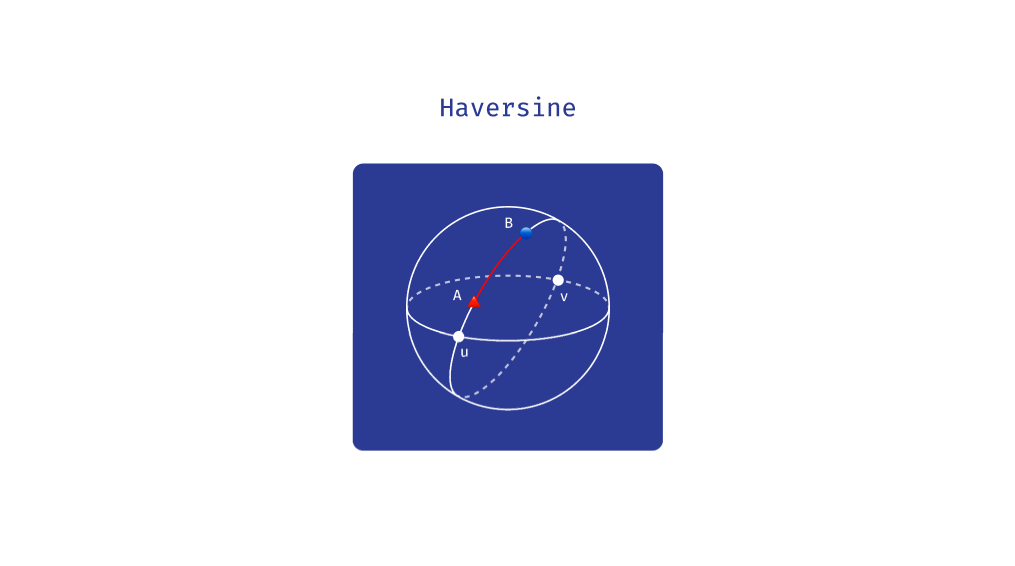

О практическом применениии формулы Хаверсина можно узнать в материалах [семинара](https://colab.research.google.com/drive/1lou5UahIJaA6zbD2pfgGt_bmfFIaG8jU?usp=sharing).

您可以在[研讨会](https://colab.research.google.com/drive/1lou5UahIJaA6zbD2pfgGt_bmfFIaG8jU?usp=sharing) 的材料中了解 Haversine 公式的实际应用。

Более подробно про метрики можно узнать из материалов [лекций курса "Математика для анализа данных"](https://teach-in.ru/lecture/2021-11-18-Matematiki2-1).

您可以从 [“数据分析的数学”课程讲座](https://teach-in.ru/lecture/2021-11-18-Matematiki2-1) 的材料中了解有关度量的更多信息。

Приведём несколько функций для подсчета различных расстояний из `numpy`:

以下是一些用于从“numpy”计算不同距离的函数：

In [1]:
"""
Numpy 有一个专门用于处理各种线性代数结构的模块。这个模块叫做numpy.linalg
具体来说，在这个模块中，你可以找到一个函数，用于计算某个向量的范数，或者更简单地说，从某个度量的角度计算它的长度。
该函数称为 numpy.linalg.norm
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
"""

import numpy as np
from numpy.linalg import norm

In [2]:
"""
在基本情况下，np.linalg.norm 计算我们最熟悉、最易理解的 2-范数，它对应于欧几里得度量
"""
vec = np.array([1,2,3])

In [3]:
np.linalg.norm(vec)

3.7416573867739413

In [4]:
# 现在我们自己计算一下这个向量的长度
np.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)

3.7416573867739413

На основе функции `linalg.norm` очень просто написать функцию для подсчета расстояния между двумя точками в многомерном пространстве

基于函数“linalg.norm”，可以很容易地编写一个函数来计算多维空间中两点之间的距离

In [5]:
def dist(a: np.ndarray, b: np.ndarray) -> float:
    """
    计算两个向量之间的距离。

    Args:
    a (np.ndarray): 第一个向量
    b (np.ndarray): 第二个向量

    Returns:
    float: 向量之间的距离
    """
    # 矢量减法
    d = a - b

    # 计算差异率
    r = np.linalg.norm(d)

    return r


In [6]:
dist(np.array([1, 0]), np.array([0, 1]))

1.4142135623730951

что, конечно, равно $\sqrt{2}$

这当然等于 $\sqrt{2}$

In [ ]:
np.sqrt(2)

1.4142135623730951

Не сложнее посчитать и расстояние городских кварталов.
Существует общая формула для вычисления целого семейства стандартных расстояний между элементами многомерного векторного пространства. Эта формула выглядит так:

$$\rho_p(\vec{x},\vec{y}) = (∑\limits_{i=1}^n|x_i - y_i|^p)^{\frac{1}{p}}$$

несложно заметить, что при $:p$=2 мы получаем формулу евклидового расстояния, а при $p$=1 - расстояния городских кварталов.

Этот параметр p можно в целом выбирать практически произвольно (не будем сейчас останавливаться на ограничениях для $p$).
Оказывается, в `np.linalg.norm` также можно выбрать параметр $p$. Этот параметр определяется значением аргумента `ord`. То есть, для того чтобы посчитать расстояние городских кварталов, достаточно присвоить значение 1 соответствующему аргументу

计算城市街区之间的距离不再困难。
有一个通用公式可以计算多维向量空间元素之间的一整类标准距离。该公式如下所示：

$$\rho_p(\vec{x},\vec{y}) = (∑\limits_{i=1}^n|x_i - y_i|^p)^{\frac{1}{p}}$$

容易看出，当$p$=2时，我们得到欧几里得距离的公式，当$p$=1时，我们得到城市街区之间的距离。

这个参数 p 通常可以几乎任意选择（我们现在不讨论 $p$ 的限制）。
事实证明，在“np.linalg.norm”中你也可以选择$p$参数。该参数由“ord”参数的值决定。也就是说，为了计算城市街区的距离，只需将值 1 分配给相应的参数即可。

In [7]:
import numpy as np

def dist(a: np.ndarray, b: np.ndarray, p: int) -> float:
    """
    使用 Lp 度量计算两个向量之间的距离。

    Args:
    a (np.ndarray): 第一个向量
    b (np.ndarray): 第二个向量
    p (int): 度量参数 Lp（通常为 1、2 或 ∞）

    Returns:
    float: 按 Lp 度量的向量之间的距离
    """
    # 矢量减法
    d = a - b

    # 使用 Lp 度量计算差值范数
    r = np.linalg.norm(d, ord=p)

    return r

In [8]:
dist(np.array([1, 0]), np.array([0, 1]), 1)

2.0

То же можно осуществить и для косинусного расстояния

对于余弦距离也可以做同样的事情。

In [9]:
def cosine(a: np.ndarray, b: np.ndarray) -> float:
    """
    计算两个向量之间角度的余弦。

    Args:
    a (np.ndarray): 第一个向量
    b (np.ndarray): 第二个向量

    Returns:
    float: 向量间夹角的余弦
    """
    # 向量的点积
    dot = np.dot(a, b)

    # 向量范数
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    # 计算余弦
    cos = dot / norm_a / norm_b

    return cos

def cosine_dist(a: np.ndarray, b: np.ndarray) -> float:
    """
    计算两个向量之间的余弦距离。

    Args:
    a (np.ndarray): 第一个向量
    b (np.ndarray): 第二个向量

    Returns:
    float: 向量之间的余弦距离
    """
    # 计算角度的余弦
    cos = cosine(a, b)

    # 余弦距离公式
    dist = 1 - cos

    return dist

In [10]:
cosine(np.array([1,0]), np.array([0,1]))

0.0

In [11]:
cosine_dist(np.array([1,0]), np.array([0,1]))

1.0

Это логично, ведь векторы перпендекулярны.

Но то же можно сделать намного проще, воспользовавшись функцией из модуля `scipy`.

这是合乎逻辑的，因为向量是垂直的。

但是，使用“scipy”模块中的函数可以更简单地完成相同的操作。

In [12]:
from scipy.spatial.distance import cosine as c

In [13]:
c(np.array([1,0]), np.array([0,1]))

1.0

Важный недостаток KNN состоит в его неоднозначности: одинаковая сумма голосов может достигаться на нескольких классах одновременно. Конечно, если классов всего два, можно взять нечетное число $k$, и проблема будет решена, но если классов будет больше, нас это не спасет. Есть более общий вариант решения этой проблемы: введем последовательность весов $w_i$, каждый из которых будет задавать **вклад** $i$-го соседа в классификацию. В этом случае $w_i$ показывает то, насколько $i$-й объект удален от классифицируемого. Выбор последовательность весов $w_i$ ложится на наши плечи и представляет собой эвристику.


KNN 的一个重要缺点是它的模糊性：在多个类别上可以同时获得相同的投票总和。当然，如果只有两个类，我们可以取奇数$k$，问题就解决了，但如果有更多的类，这就救不了我们了。这个问题有一个更通用的解决方案：我们引入一个权重序列 $w_i$，每个权重将定义第 $i$ 个邻居对分类的 **贡献**。在这种情况下，$w_i$ 表示第 $i$ 个对象与被分类的对象之间的距离。权重序列 $w_i$ 的选择落在我们的肩上，是一种启发式方法。

____________________________________________________________________________________________________________________
## Дополнение (опциональное) *

Почему бы не сделать так, чтобы более близким объектам соответствовали более высокие веса, а дальним – маленькие? То есть сделать так, чтобы $w_i$ зависел не от номера $i$ непосредственно, а от расстояния между $x$ и $x_i$

Такой метод называется методом окон Парзена

$$ a_h(x) =  \arg \max_{y \in Y} \sum\limits_{i=1}^l [y^{(i)} = y]K\big{(}\frac{\rho(x, x_i)}{h}\big{)}  $$

**Пояснение**:
смысл этой формулы состоит вновь в том, что мы рассматриваем все классы из множества классов $Y$ (на этот раз их может быть больше, чем 2). Для каждого класса считаем сумму *важностей* тех объектов, которые принадлежат к этому классу, относительно классифицируемого объекта $x$ и выбираем тот класс, для которого соответствующее значение получилось наибольшим.

Обратите внимание, что в записи данной формулы присутствует некая функция $K$. Что это такое? Это функция, которая называется **ядром**, и обладает следующими свойствами: она не возрастает с ростом аргумента (если тот больше нуля). Она четная (симметрична относительно нуля), непрерывна и ограничена. То есть ядро в данном контексте понимается как функция **важности** ее аргумента.

Обратите внимание, что ядро здесь зависит от аргумента, пропорционального расстоянию до объекта и обратно пропорционального ширине окна $h$. Обычно ядра выбирают так, чтобы оно было нулевым за пределами отрезка от -1 до 1. Как это понимать? Для всех $x$, что лежат к классифицируемому объекту **ближе, чем размер окна $h$,** мы задаем вес обратно пропорциональный расстоянию для этого объекта, а для $x$, лежащих **за пределами окна размера $h$**, задаем нулевой вес.

____________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________________
附加组件（可选）*

为什么不让较近的物体具有较高的权重，而较远的物体具有较低的权重呢？也就是说，让 $w_i$ 不直接依赖于数字 $i$，而是依赖于 $x$ 和 $x_i$ 之间的距离

这种方法称为Parzen窗口方法。

$$ a_h(x) = \arg \max_{y \in Y} \sum\limits_{i=1}^l [y^{(i)} = y]K\big{(}\frac{\rho(x, x_i)}{h}\big{)} $$

**解释**：
这个公式的含义再次是，我们考虑类集合 $Y$ 中的所有类（这次可以超过 2 个）。对于每一个类，我们计算属于这个类的那些对象相对于分类对象 $x$ 的*重要性*总和，并选择相应值最大的类。

请注意，在这个公式的项中有一个特定的函数$K$。这是什么？这是一个称为**内核**的函数，具有以下属性：它不会随着其参数的增长而增加（如果它大于零）。它是偶数（关于零对称）、连续且有界的。也就是说，此上下文中的核心被理解为其参数的**重要性**的函数。

请注意，这里的核取决于与到对象的距离成正比、与窗口宽度 $h$ 成反比的参数。通常，选择的核使得它在 -1 到 1 的段之外为零。这应该如何理解？对于所有**比窗口大小 $h$ 更接近分类对象的 $x$，我们分配一个与该对象的距离成反比的权重，对于**在大小为 $h$ 的窗口之外**的 $x$，我们分配零权重。

______________________________________________________________________________________________________________________________

# А что делать с задачей регрессии?

## Рассмотрим ее на таком примере:

Вам дали карту гор, но высоты указаны лишь для некоторых точек на этой карте. Вас же просят определить, какова вероятная высота рельефа в некоторых других точках?


![](https://drive.google.com/uc?export=view&id=1JyFbK0epT6EAZ2OSF34ZZdwBxfxeikq0)

如何处理回归问题？

让我们用这个例子来看一下：

给你一张山脉地图，但地图上只给出了部分点的高度。您是否被要求确定其他一些点的地形的可能海拔高度？

Для того чтобы определить высоту в синей точке логично будет:

а)  рассматривать не все имеющиеся данные, а лишь те точки, которые расположены в некоторой окрестности искомой точки;

б) усреднить значения высот в близких точках с учетом их близости.


![](https://drive.google.com/uc?export=view&id=19gUdmqRScLDD5rtGVgxnQ_deFZVb9SF2)

为了确定蓝点的高度，以下做法是合理的：

a) 不考虑所有可用数据，而只考虑位于所需点某个邻域内的点；

b) 考虑到附近点的接近度，对附近点的高度值进行平均。

## KNN для регрессии

Воспользуемся этой идеей, чтобы получить обобщение метода на задачу регрессии.

Рассмотрим следующие три идеи:

- Идея 1: Если нам даны $n$ точек из обучающей выборки, и известно значение скрытой функции в этих точках, то во всех остальных наше предсказание может быть усреднением значений во всех известных точках
- Идея 2: Мы можем попытаться найти константу получше, чем просто среднее значение. Пусть это будет константа $\alpha$ в окрестности $x \in X$. Как определить эту константу?

Мы хотим, чтобы эта константа была как можно сильнее похожа на все известные нам в окрестности значения функции в некотором "общем смысле". Посмотрим, насколько эта константа отличается от каждого из известных значений, и усредним ошибку. Однако, мы не можем просто так взять и усреднить значение ошибки в явном виде. Рассмотрим пример:

Пусть ошибка в точке А составила 100, а в точке B — -100. Тогда средняя ошибка будет 0, несмотря на то, что наша константа очень сильно ошибается в каждой конкретной точке. Поэтому усреднять мы будем не значение ошибки, а значение **квадрата ошибки**.

Так как определить эту константу? Решив задачу минимизации среднего квадрата отклонения известных значений $y_i$ от этой константы. Именно такой функционал представляет собой усредненную ошибку нашего предсказания по всему датасету: $$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N (y_i - \alpha)^2$$
Или мы можем учесть важность каждого из объектов $w_i$: $$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N w_i(y_i - \alpha)^2$$

Математика позволяет нам найти такое значение $α$, что средний квадрат ошибки принимает наименьшее из всех возможных значений.



KNN 用于回归

让我们利用这个想法来将该方法推广到回归问题。

考虑以下三个想法：

- 想法1：如果我们从训练集中给出$n$个点，并且这些点处的隐藏函数值已知，那么在所有其他点处我们的预测可以是所有已知点处的值的平均值
- 想法 2：我们可以尝试找到一个比平均值更好的常数。设它是 $x \in X$ 邻域内的常数 $\alpha$。如何确定这个常数呢？

我们希望这个常数在某种“一般意义”上与我们在邻域内已知的函数的所有值尽可能的相似。让我们看看这个常数与每个已知值的差异有多大，然后取平均误差。然而，我们不能简单地明确地取误差值的平均数。让我们看一个例子：

令 A 点处的误差为 100，令 B 点处的误差为 -100。那么平均误差将为 0，尽管我们的常数在每个特定点上都是非常错误的。因此，我们不会对误差值取平均值，而是对**平方误差**的值取平均值。

那么我们如何定义这个常数呢？解决了最小化已知$y_i$值与该常数的均方差的问题。这是表示我们对整个数据集的预测平均误差的函数：$$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N (y_i - \alpha)^2$$
或者我们可以考虑每个对象 $w_i$ 的重要性： $$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N w_i(y_i - \alpha)^2$$

数学使我们能够找到一个 $α$ 的值，使得均方误差取所有可能值中最小的值。

## Опционально*
_____________________________________________
- Идея 3: Попробуем делать предсказания, усредняя все известные значения из обучающей выборки с учетом их важности для данного объекта. То есть если точка $x_i$ находится далеко от $X$, то для предсказания в точке $X$ вклад $y_i$ будет маленьким, а если близко - большим. Тогда мы можем записать следующую формулу: $$A(X) = \frac{\sum\limits_{i=1}^N w_i y_i}{\sum\limits_{i=1}^N w_i} = \frac{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h}) y_i}{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h})}$$

Функция $K$ здесь как раз таки говорит нам, насколько важен конкретный объект из обучающей выборки для предсказания в анализируемой точке.

选修的*
___________________________________________
- 想法 3：让我们尝试通过对训练样本中所有已知值取平均值来做出预测，同时考虑到它们对给定对象的重要性。也就是说，如果点$x_i$距离$X$较远，那么对于点$X$处的预测，$y_i$的贡献就会很小，如果距离很近，那么$y_i$的贡献就会很大。然后我们可以写出以下公式： $$A(X) = \frac{\sum\limits_{i=1}^N w_i y_i}{\sum\limits_{i=1}^N w_i} = \frac{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h}) y_i}{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h})}$$

这里的 $K$ 函数告诉我们训练样本中的特定对象对于分析点的预测有多重要。

 ___________________________________________________________________________________________________________________
# Преимущества и недостатки метрических алгоритмов


___________________________________________________________________________________________________________________
度量算法的优点和缺点

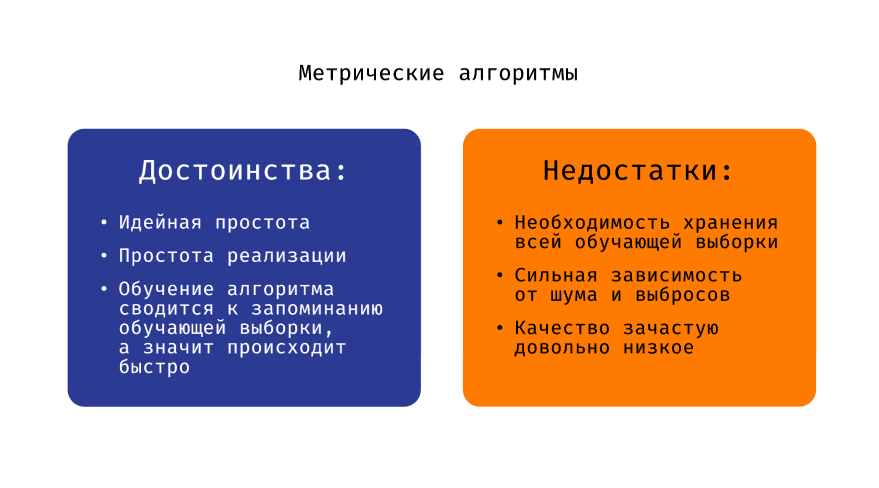

# Попробуем реализовать алгоритм KNN своими руками!

我们来尝试亲手实现KNN算法吧！

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

## Реализация на Python

Напишем функцию KNN, которая вернет нам предсказание, согласно алгоритму k ближайших соседей и набор k ближайших точек, по которым было сделано предсказание
### Предположения:
#### - Работаем на двумерной плоскости
#### - Решаем задачу бинарной классификации
#### - k подбираем руками

Python 实现

让我们编写一个 KNN 函数，它将根据 k 个最近邻算法和一组进行预测的 k 个最近点返回一个预测。
假设：
- 在二维平面上工作
-解决二元分类问题
- k 我们手工捡起

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw(KNN):
    """
    允许呈现 KNN 函数输出的装饰器
    """

    def wrapper(point: list, class1: np.ndarray, class2: np.ndarray, N: int, normfunc):
        print(KNN.__name__, "running")
        plt.figure(figsize=(10, 10))

        """
        设置班级规模
        """
        num_1 = class1.shape[0]
        num_2 = class2.shape[0]
        num = num_1 + num_2

        """
        我们设置每个类的点的坐标为 X 和 Y
        """
        X1 = class1[:, 0]
        Y1 = class1[:, 1]
        X2 = class2[:, 0]
        Y2 = class2[:, 1]
        X = np.concatenate([X1, X2])
        Y = np.concatenate([Y1, Y2])
        class_flag = [0 for i in range(num_1)] + [1 for i in range(num_2)]

        """
        我们将所有内容写入数据框以使用 seaborn 方法
        """
        data = pd.DataFrame({"Class": class_flag, "X": X, "Y": Y})
        plt.grid()
        plt.scatter(x=point[0], y=point[1], c="r")
        sns.scatterplot(data=data, x="X", y="Y", hue="Class")

        """
        我们使用自己编写的函数来获取算法的输出
        """
        result, sorted_points = KNN(point, class1, class2, N, normfunc)
        print(f"RESULT: point was assigned to class {result}")

        for i in range(N):
            plt.plot(
                [sorted_points[i][0], point[0]],
                [sorted_points[i][1], point[1]],
                c="r" if sorted_points[i][2] == 0 else "b",
            )

    return wrapper


In [16]:
import numpy as np

@draw
def KNN(point: list, class1: np.ndarray, class2: np.ndarray, K: int, normfunc: callable):
    """
    使用 KNN 算法进行点分类
    """

    """
    设置班级规模
    """
    num_1 = class1.shape[0]
    num_2 = class2.shape[0]
    num = num_1 + num_2

    """
    我们设置每个类的点的坐标为 X 和 Y
    """
    X1 = class1[:, 0]
    Y1 = class1[:, 1]
    X2 = class2[:, 0]
    Y2 = class2[:, 1]

    # 将数组转换为 (n, 1) 格式以便与 numpy 正确配合使用
    X = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)])
    Y = np.concatenate([Y1.reshape(-1, 1), Y2.reshape(-1, 1)])

    """
    我们通过给所有点添加它们所属类别的值来对它们进行排序，
    根据给定的距离函数 normfunc = normfunc(x1, y1, x2, y2)
    """
    class_flag = np.array(
        [0 for i in range(num_1)] + [1 for i in range(num_2)]
    ).reshape(-1, 1)
    keyfunc = lambda P: normfunc(P[0], P[1], point[0], point[1])
    points = np.concatenate((X, Y, class_flag), axis=1).tolist()

    sorted_points = sorted(points, key=keyfunc)

    """
    我们循环计算从 top-K 开始属于 0 类和 1 类的点数
    """
    C0 = 0
    C1 = 0
    for p in sorted_points[:K]:
        assert p[2] == 1 or p[2] == 0
        if p[2] == 0:
            C0 += 1
        else:
            C1 += 1
    result = 0 if C0 > C1 else 1
    print(f"There are {C0} points of class 0 in the set of {K} nearest points")
    print(f"There are {C1} points of class 1 in the set of {K} nearest points")
    return result, sorted_points[:K]


## Примеры использования

使用示例

KNN running
There are 30 points of class 0 in the set of 30 nearest points
There are 0 points of class 1 in the set of 30 nearest points
RESULT: point was assigned to class 0


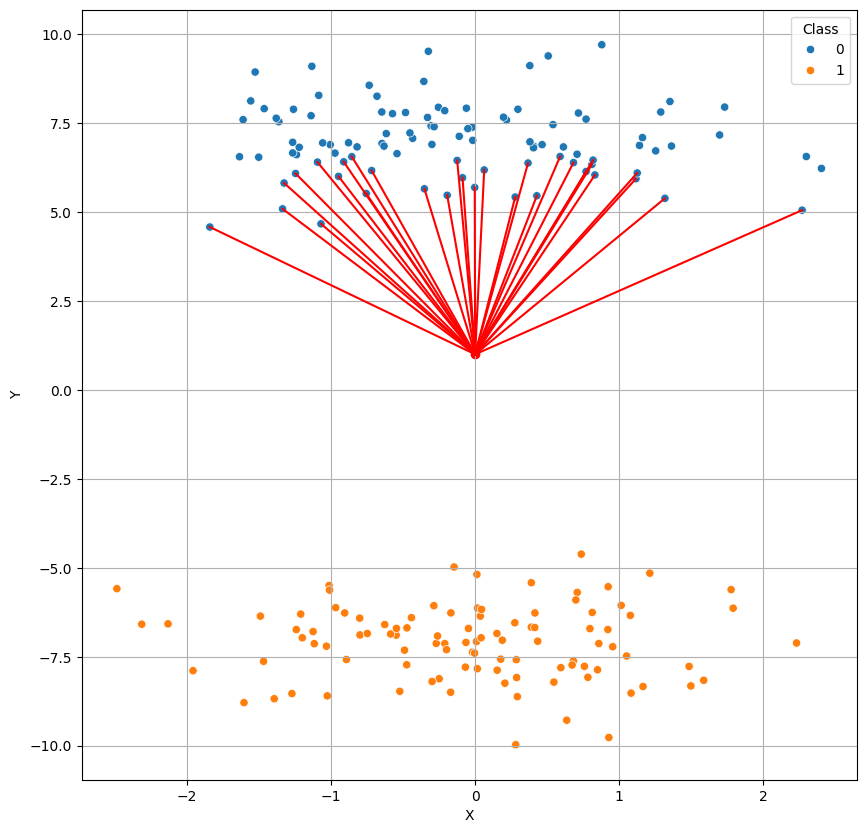

In [17]:
import numpy as np
import random

def euc_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    """
    计算两点之间的欧几里得距离。

    Args:
    point_1_x (float): 第一个点的 X 坐标
    point_1_y (float): 第一个点的 Y 坐标
    point_2_x (float): 第二个点的 X 坐标
    point_2_y (float): 第二个点的 Y 坐标

    Returns:
    float: 两点之间的欧几里得距离
    """
    x_diff = point_1_x - point_2_x
    y_diff = point_1_y - point_2_y
    return np.sqrt(x_diff**2 + y_diff**2)

def generate_class_data(mean1, mean2, std_dev, n_samples):
    """
    为两个类生成随机数据。

    Args:
    mean1 (list): 第一类的平均值
    mean2 (list): 第二类的平均值
    std_dev (float): 标准差
    n_samples (int): 每个类别的样本数

    Returns:
    tuple:
        class1 (numpy.ndarray): 第一类的数据
        class2 (numpy.ndarray): 第二类的数据
    """
    class1 = np.random.randn(n_samples, 2) + np.array(mean1)
    class2 = np.random.randn(n_samples, 2) + np.array(mean2)
    return class1, class2

# 生成课程数据
point = [0, 1]
mean1 = [0.0, 7.0]
mean2 = [0.0, -7.0]
std_dev = 1.0
n_samples = 100

class_1, class_2 = generate_class_data(mean1, mean2, std_dev, n_samples)

K = 30
KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 14 points of class 0 in the set of 30 nearest points
There are 16 points of class 1 in the set of 30 nearest points
RESULT: point was assigned to class 1


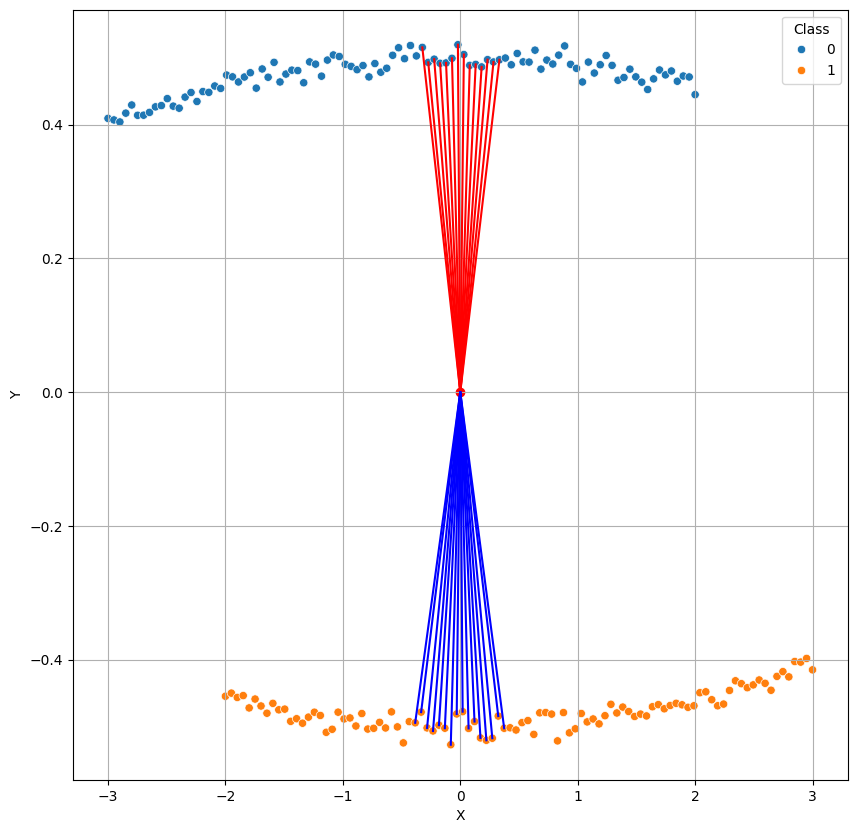

In [19]:
import numpy as np

# 初始化点
point = [0, 0]

# 创建类数组
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

class_1 = np.array(class_1)
class_2 = np.array(class_2)

K = 30

KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 5 points of class 0 in the set of 30 nearest points
There are 25 points of class 1 in the set of 30 nearest points
RESULT: point was assigned to class 1


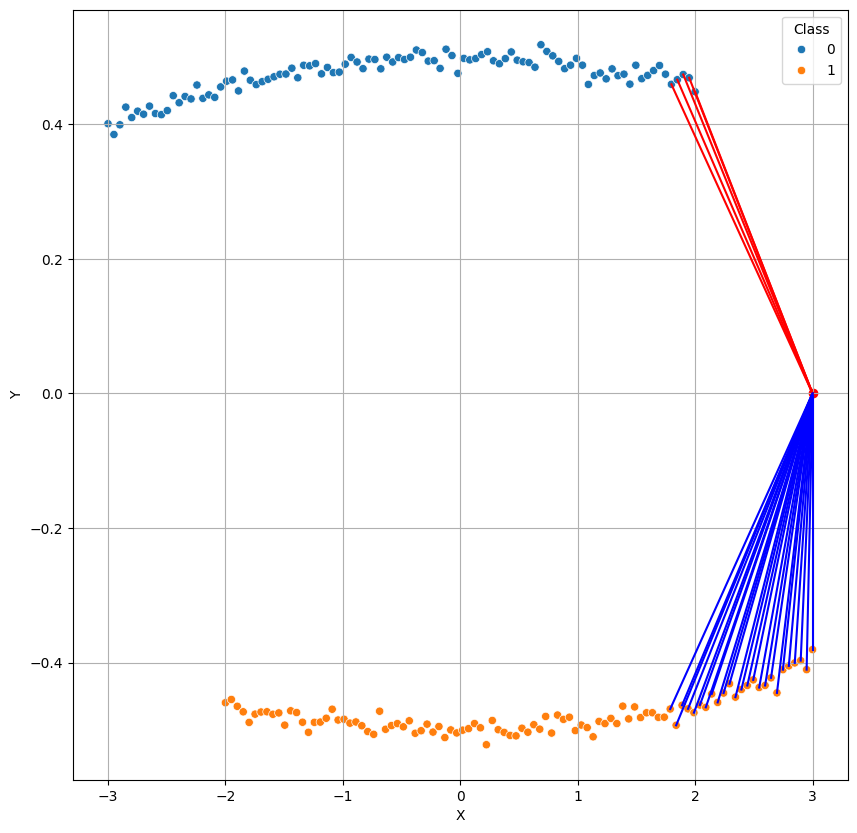

In [18]:
import numpy as np

# 初始化点
point = [3, 0]

# 创建类数组
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

class_1 = np.array(class_1)
class_2 = np.array(class_2)

K = 30

KNN(point, class_1, class_2, K, euc_distance)

## Неправильный выбор K

Часто бывает так, что выбранный K плохо подходит для решения данной задачи. Причем увеличение K не всегда приводит к улучшению работы алгоритма

错误选择 K

经常发生的情况是，所选的 K 不太适合解决给定的问题。此外，增加 K 并不总是会导致算法性能的改善。

KNN running
There are 2 points of class 0 in the set of 10 nearest points
There are 8 points of class 1 in the set of 10 nearest points
RESULT: point was assigned to class 1


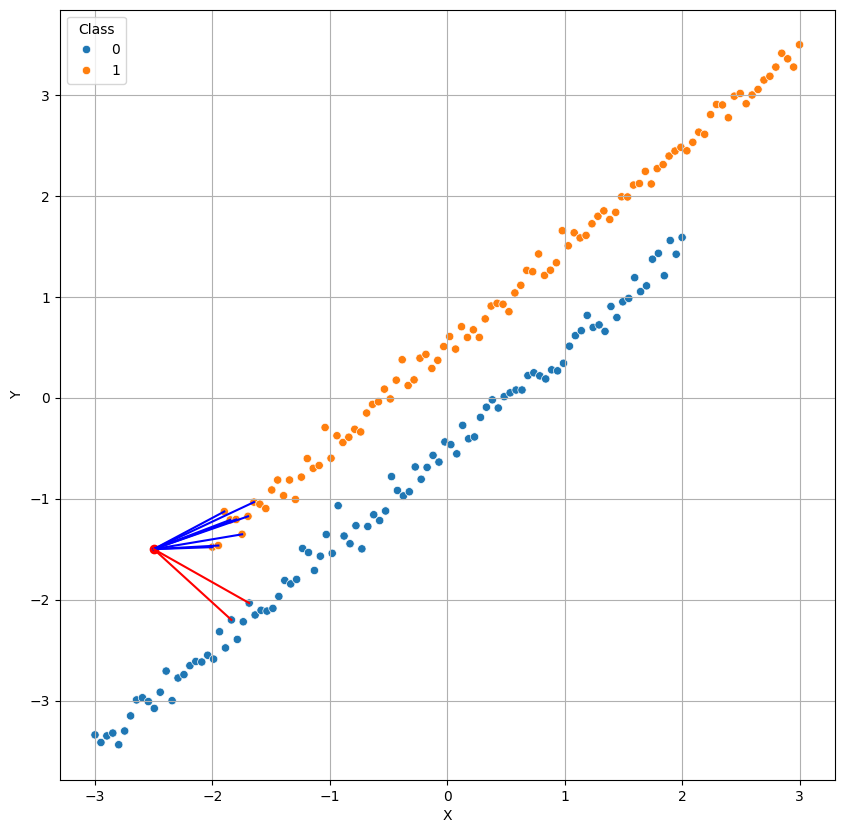

In [20]:
import numpy as np

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 10
KNN(point, class_1, class_2, K, euc_distance)

**Казалось бы - чем больший k мы выберем, тем надежнее наш алгоритм отработает. НО:**

В этом случае мы видим, что это не так

**看起来，我们选择的 k 越大，我们的算法就越可靠。但：**

在这种情况下，我们发现事实并非如此。

KNN running
There are 64 points of class 0 in the set of 100 nearest points
There are 36 points of class 1 in the set of 100 nearest points
RESULT: point was assigned to class 0


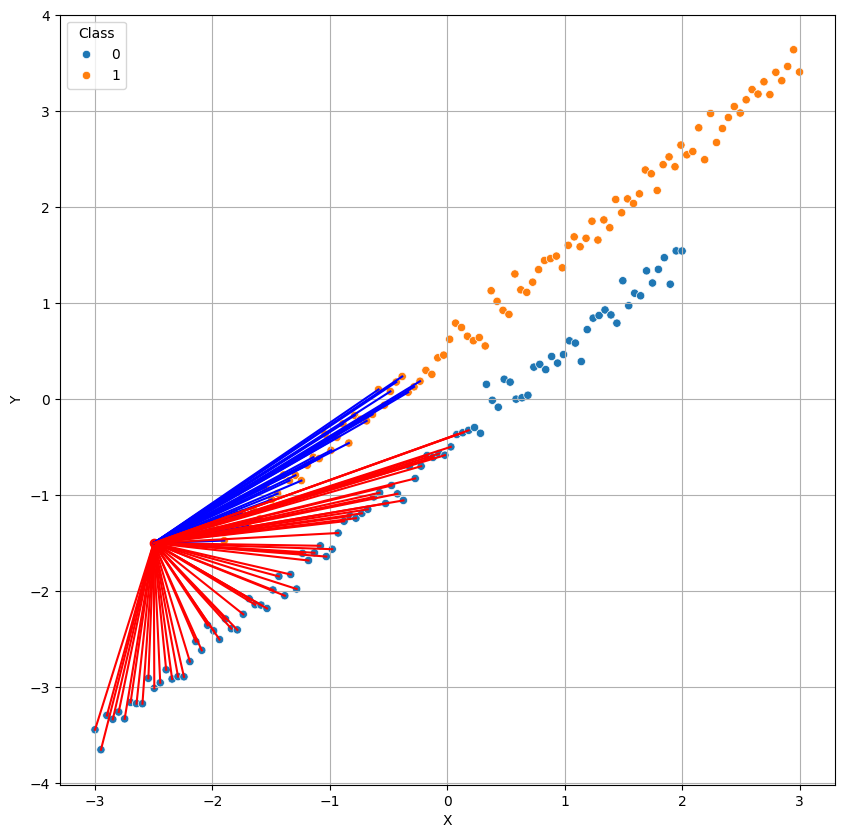

In [21]:
import numpy as np

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 100
KNN(point, class_1, class_2, K, euc_distance)

## Адаптация метрик

Обратим внимание, что классические метрики конкретно в данном случае очень плохо отражают особенности поставленной задачи.

В данном случае наши выборки имеют ленточную структуру. Кажется вполне логичным рассматривать метрику, учитывающую этот факт.

Например, можно рассмотреть такую функцию:

$$f(x_1,y_1, x_2, y_2) = |\hat{b_1} - \hat{b_2}| = |(x_1 - y_1) - (x_2 - y_2)|$$

$\hat{b}$ здесь - это что-то вроде коэффициента смещения прямой, на которой лежит пара точек ($x$, $y$) при условии, что мы считаем угловой коэффициент такой прямой единичным

指标调整

我们要注意的是，在这种特殊情况下，传统指标很难反映当前任务的特点。

在这种情况下，我们的样品具有带结构。考虑一个将这一事实考虑在内的指标似乎很合逻辑。

例如，我们可以考虑以下函数：

$$f(x_1,y_1, x_2, y_2) = |\hat{b_1} - \hat{b_2}| = |(x_1 - y_1) - (x_2 - y_2)|$$

这里的 $\hat{b}$ 类似于一对点 ($x$, $y$) 所在直线的位移系数，假设我们认为该直线的斜率为 1

KNN running
There are 0 points of class 0 in the set of 100 nearest points
There are 100 points of class 1 in the set of 100 nearest points
RESULT: point was assigned to class 1


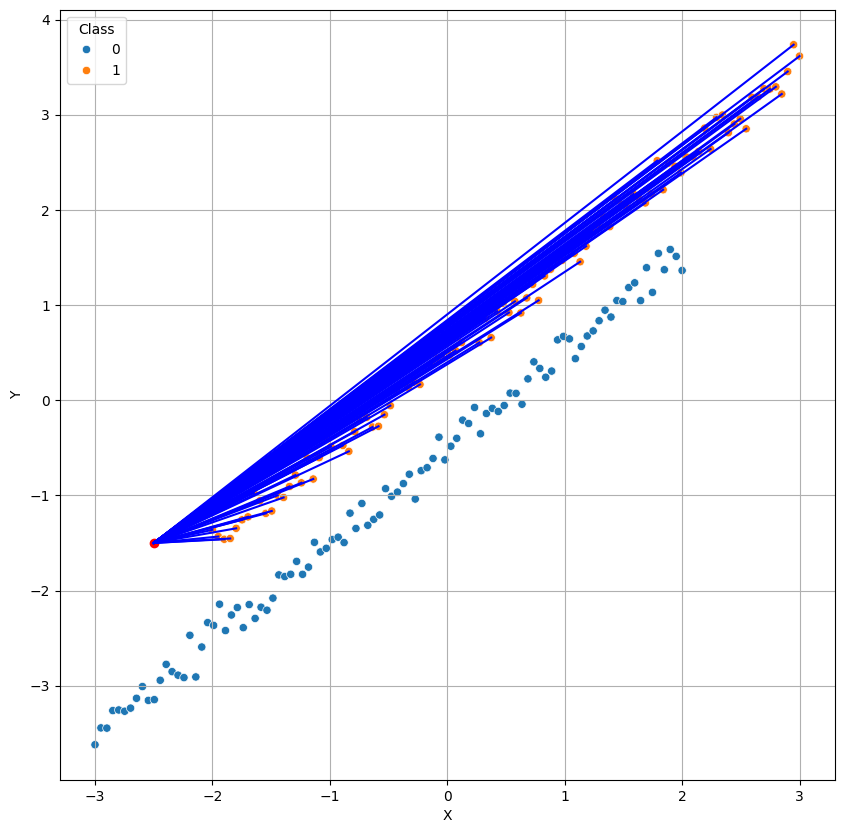

In [22]:
import numpy as np

def sub_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    return abs((point_1_x - point_1_y) - (point_2_x - point_2_y))

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 100
KNN(point, class_1, class_2, K, sub_distance)

Эта метрика подходит нам довольно хорошо

这个指标非常适合我们。

KNN running
There are 0 points of class 0 in the set of 100 nearest points
There are 100 points of class 1 in the set of 100 nearest points
RESULT: point was assigned to class 1


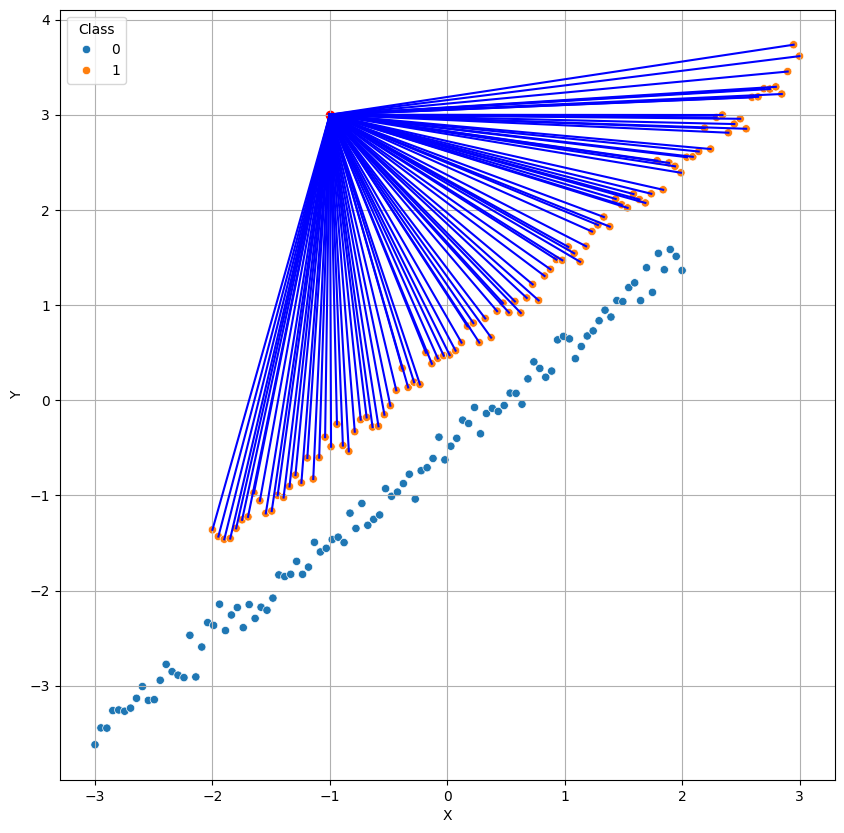

In [23]:
point = [-1.0, 3.0]

K = 100
KNN(point, class_1, class_2, K, sub_distance)

KNN running
There are 100 points of class 0 in the set of 100 nearest points
There are 0 points of class 1 in the set of 100 nearest points
RESULT: point was assigned to class 0


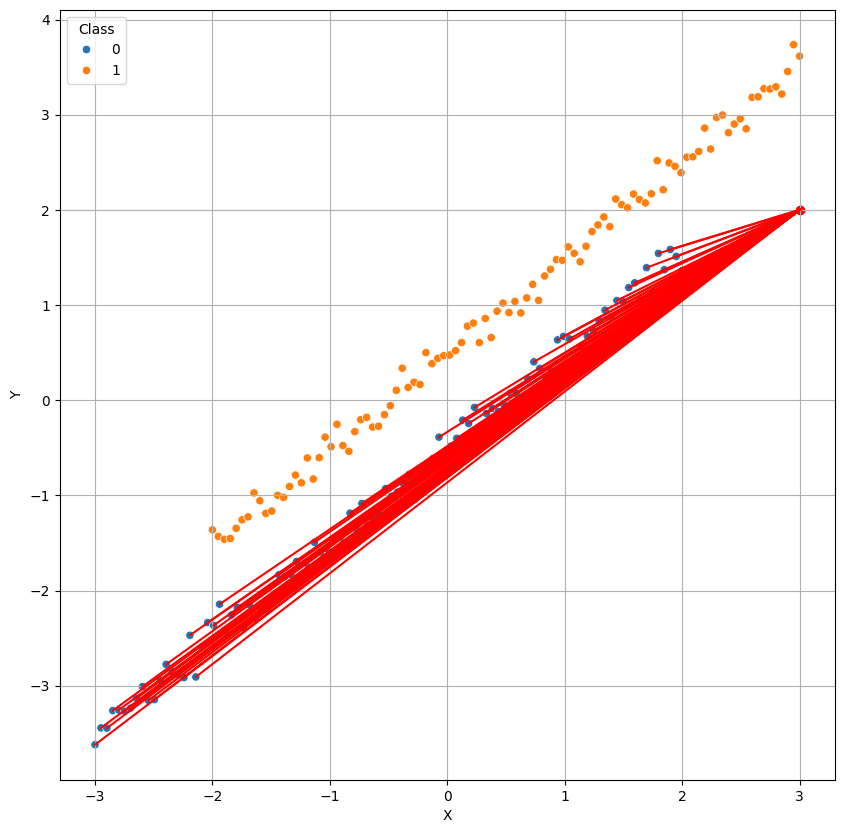

In [24]:
point = [3., 2.]

K = 100
KNN(point, class_1, class_2, K, sub_distance)

**ЗАМЕЧАНИЕ**: приведенные функции взяты лишь для примера и, вообще говоря, не являются метриками. Это просто показать:

Выберем $x_1, y_1$ и $x_2,y_2$ лежащими на одной и той же прямой, но не совпадающими. Значение обеих приведенных функций на таких парах будет равно 0, то есть не выполняется первое свойство расстояния

**注意**：所展示的功能仅作为示例，并不代表一般指标。很容易证明：

让我们选择 $x_1, y_1$ 和 $x_2,y_2$ 位于同一条线上，但不重合。此类对上的两个给定函数的值将等于 0，即距离的第一个性质不满足。

## Реализация в sklearn

Нам не нужно каждый раз реализовывать KNN самостоятельно, ведь он уже реализован в замечательной библиотеке `sklearn`!

В качестве параметров при инициализации алгоритма передаются:
  - `n_neighbors: int`, параметр отвечающий за выбранное число соседей (K)
  - `metric: string or callable object`. В качестве metric можно передать либо одну из фиксированного набора строк (этот набор можно посмотреть в официальной документации, либо обратившись к `sklearn.metrics.pairwise`.`PAIRWISE_DISTANCE_FUNCTIONS`, как в следующей ячейке), либо написать свою функцию расстояния и передать её в качестве аргумента,
  - `p: int`, параметр отвечающий за тип метрики (как было разобрано выше: `p==1` - это манхэттэнское расстояние, `p==2` - евклидово расстояние).

Остальные аргументы менее существенны для нас, однако с ними можно ознакомиться по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

在 sklearn 中实现

我们不需要每次都自己实现 KNN，因为它已经在精彩的 `sklearn` 库中实现了！

算法初始化期间传递以下参数：
 - `n_neighbors: int`，负责选定邻居数量（K）的参数
 - `metric：字符串或可调用对象`。作为度量，您可以传递一组固定的字符串（可以在官方文档中找到此集合，或者通过访问 `sklearn.metrics.pairwise`.`PAIRWISE_DISTANCE_FUNCTIONS`，如下一个单元格所示），或者编写自己的距离函数并将其作为参数传递，
 - `p: int`，负责度量类型的参数（如上所述：`p==1` 是曼哈顿距离，`p==2` 是欧几里得距离）。

其余参数对我们来说不太重要，但你可以在[链接]（https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html）上阅读有关它们的信息

In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import warnings

# 定义训练示例和目标值
samples = np.array([[0.0, 0.0, 0.0], [0.0, 0.5, 0.0], [1.0, 1.0, 0.5]])
y = np.array([[1.0], [1.0], [0.0]])

# 创建 KNeighborsClassifier 实例
neigh = KNeighborsClassifier(n_neighbors=1, p=2)

# 模型训练
neigh.fit(samples, y)

# 预测新示例
new_sample = np.array([[1.0, 1.0, 1.0]])
predicted_class = neigh.predict(new_sample)[0]

print(f"结果：该点被分配给该类 {int(predicted_class)}")

结果：该点被分配给该类 0


In [26]:
import sklearn
# 可能的指标
sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

### Пример использования косинусного расстояния

使用余弦距离的示例

In [27]:
# 使用余弦距离实例化 KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric='cosine')

# 模型训练
neigh.fit(samples, y)

# 预测新示例
new_sample = np.array([[1.0, 1.0, 1.0]])
predicted_class = neigh.predict(new_sample)[0]

print(f"结果：该点被分配给该类 {int(predicted_class)}")

结果：该点被分配给该类 0


# Как выбрать K?





Загрузим известный датасет `wine` и попробуем проанализировать, каким образом выбрать оптимальное количество ближайших соседей. Мы пойдем таким путём: воспользуемся методом перекрёстной валидации для определения того, насколько хорошо алгоритм при некотором `K` решаеет поставленную задачу, а затем воспользуемся самым простым способом подбора гиперпараметров - переборным.

让我们加载著名的“葡萄酒”数据集并尝试分析如何选择最佳的最近邻居数量。我们将这样做：我们将使用交叉验证方法来确定算法对于某个“K”的问题解决得有多好，然后我们将使用最简单的方法来选择超参数——枚举。

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
print(f'X.shape: {X.shape}')

X.shape: (178, 13)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

score = cross_val_score(clf, X, y, cv=5)

print(f'Cross Validation Score, cv=5: {score}')

Cross Validation Score, cv=5: [0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]


In [30]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm

k_candidates = list(range(1, 51))
scores = []

for k in tqdm(k_candidates):
    clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))

  0%|          | 0/50 [00:00<?, ?it/s]

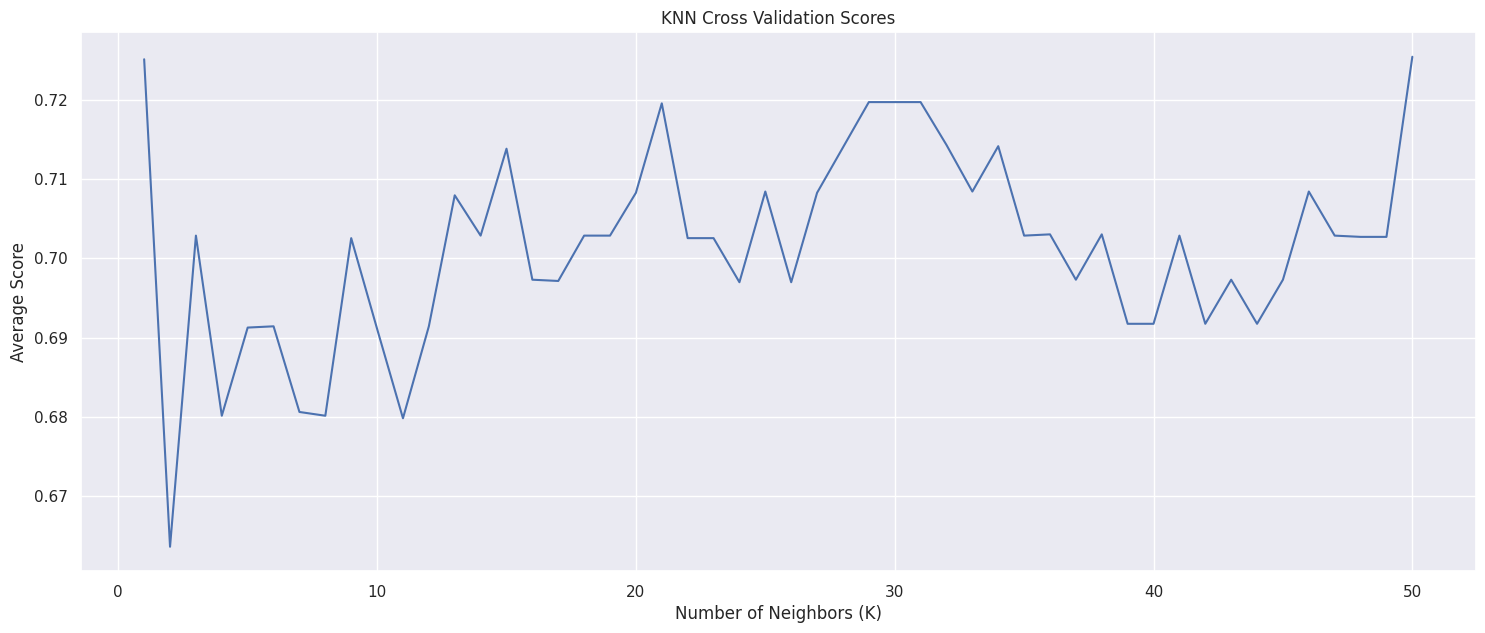

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(18, 7))
plt.plot(np.arange(1, 51), scores)
plt.title('KNN Cross Validation Scores')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

In [32]:
k_best = np.argmax(scores) + 1
k_best

50

Представленный код нужно интерпретировать следующим образом:

При помощи функции `sklearn.model_selection.crossval` мы разбили выборку на $cv$=5 элементов, и провели описанную выше процедуру для каждого из них, получив 5 оценок качества (по умолчанию выставлена метрика `accuracy_score`). Эти оценки сохранены в массиве `score`.

В аргументы функции `cross_val_score` мы передали:
* объект класса `KNeighborsClassifier (clf)`. В качестве этого аргумента может быть выбран любой классификатор, поддерживающий методы `.fit()`, `.predict()` и (в случае необходимости для соответствующей метрики) `.predict_proba()`. Это функции обучения, предсказания и получения вероятности принадлежности объектов тому или иному классу соответственно. Это очень удобно, потому что позволяет нам использовать в качестве аргумента `clf` не только объекты классов из `sklearn`, но также и из других библиотек (или даже собственные классы).

* Обучающую выборку $X$
* Ответы к объектам обучающей выборки $y$
* $cv$ - количество "кусочков", на которые мы разбиваем выборку

Подробнее об этой функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).


提供的代码应解释如下：

使用 `sklearn.model_selection.crossval` 函数，我们将样本分成 $cv$=5 个元素，并对每个元素执行上述过程，获得 5 个质量分数（默认设置 `accuracy_score` 指标）。这些分数存储在“分数”数组中。

我们将以下内容传递给 `cross_val_score` 函数的参数：
* `KNeighborsClassifier (clf)` 类的对象。任何支持 `.fit()`、`.predict()` 和（如果相应度量需要）`.predict_proba()` 方法的分类器都可以选择作为该参数。这些分别是学习、预测和获取对象属于特定类别的概率的函数。这非常方便，因为它允许我们不仅使用来自“sklearn”的类对象作为参数“clf”，还可以使用来自其他库（甚至我们自己的类）的类对象作为参数“clf”。

* 训练样本$X$
* 训练样本对象 $y$ 的答案
* $cv$ - 我们将样本分成的“块”的数量

关于此功能的更多详细信息，请参阅[文档](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)。

Этот набор чисел очень о многом нам говорит:

По среднему значению мы можем определить, насколько хорош в среднем наш алгоритм. Именно среднее значение набора метрик, полученных при кросс-валидации, считается валидной оценкой качества построенного алгоритма.

Но здесь есть свои сложности. Представим, что на выходе мы получим следующий набор чисел:

$$[0.5, 0.52, 0.9, 0.55]$$

Средним значением здесь будет 0.61, что, очевидно, связано с аномально хорошим результатом на третьей позиции. Этот результат может быть обусловлен случайностью или смещеннотью какой-то из подвыборок. Его нельзя рассматривать как абсолютно корректный. Точно также нас может ввести в заблуждение среднее значение по массиву чисел с очень большим разбросом. Например, если на выходе кросс-валидации мы получим следующий результат:

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

Верить среднему значению здесь, очевидно, нельзя. Следует искать ошибку.
Отследить такие случаи можно при помощи оценки стандартного отклонения в полученном массиве: чем оно меньше, тем оценка качества при помощи усреднения надежнее.

这组数字告诉了我们很多：

从平均值我们可以确定我们的算法的平均水平有多好。交叉验证期间获得的一组指标的平均值被视为对构建算法质量的有效评估。

但这里也存在一些困难。假设输出结果为以下一组数字：

$$[0.5, 0.52, 0.9, 0.55]$$

这里的平均值将是0.61，这显然与第三名的异常好成绩有关。这一结果可能是由于某个子样本的偶然性或偏差造成的。这不能被认为是绝对正确的。同样，我们也可能被一系列数值差异很大的数字的平均值所误导。例如，如果我们得到以下结果作为交叉验证的输出：

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

显然，你不能相信这里的平均值。应该寻找错误。
可以通过评估结果数组中的标准差来跟踪这种情况：标准差越小，使用平均值进行的质量评估就越可靠。

# Дополнительная литература

-  [Е. М. Миркес, KNN и потенциальная энергия](http://www.math.le.ac.uk/people/ag153/homepage/KNN/KNN3.html). В источнике можно найти примеры применения KNN для снижения размерности, обнаружения выбросов в данных и т.п.

- Pattern Recognition and Machine Learning, chapter 6. C.Bishop.
В книге можно найти подробности, связанные с ядерными методами машинного обучения, в том числе в рамках KNN

进一步阅读

- [E. M. Mirkes，KNN与势能](http://www.math.le.ac.uk/people/ag153/homepage/KNN/KNN3.html)。源文件包含使用 KNN 进行降维、异常值检测等的示例。

- 模式识别和机器学习，第 6 章。C.Bishop。
本书包含与机器学习核心方法相关的详细信息，包括 KNN 框架内的内容。